# Application pour récupérer les lampadaires à partir d'un tronçon de route depuis Mapillary: 
## Sources :
https://www.mapillary.com/developer/api-documentation/points?locale=fr_FR

https://geoffboeing.com/2016/11/osmnx-python-street-networks/

https://stackoverflow.com/questions/50045662/gdfs-to-graph-and-vise-versa

https://wiki.openstreetmap.org/wiki/Key:place

https://github.com/gboeing/osmnx-examples/blob/main/notebooks/03-graph-place-queries.ipynb

https://stackoverflow.com/questions/74436361/how-to-get-all-the-substates-from-a-country-in-osmnx

https://wiki.openstreetmap.org/wiki/FR:Key:admin_level

https://wiki.openstreetmap.org/wiki/Tag%3Aplace%3Dcity

Use Kernel > CIM

Voir https://www.geeksforgeeks.org/using-jupyter-notebook-in-virtual-environment/

In [7]:
import osmnx as ox
import geopandas as gpd
import matplotlib

In [3]:
ox.settings.log_console = True
ox.settings.max_query_area_size = 25e12

## Contours communaux pour plusieurs régions

In [4]:
places =["Provence-Alpes-Côte d'Azur", "Corse", "Occitanie", "Mayotte", "la Réunion", "la Nouvelle-Calédonie", "la Polynésie Française", "Wallis&Futuna"]
place = places[0] #on choisit par exemple la région PACA
tags = {'admin_level': '8'} #le niveau 8 correspond au Communes
gdf = ox.features.features_from_place(place, tags)
print(len(gdf))

4035


## Sélection de Lorgues

In [5]:
Communes=list(gdf["name"]) # On obtient la liste de toutes les Communes dans la région PACA
i=0
while i < len(Communes):
    if (type(Communes[i]) != str):
        Communes.pop(i)
    else:
        i += 1
len(Communes) # On retient que les Communes ayant un nom valable
if ("Lorgues" in Communes):
    print(True)

Commune = "Lorgues" # On choisit comme exmple la Commune de Lorgues
Communes.index(Commune) #L'indice de la Commune de Lorgue dans la liste

True


400

,,addr:postcode,name,name:oc,place,ref:FR:SIREN,source:name:oc,geometry,ele,natural,note,...,name:ja-Hira,dog,name:Nissart,start_date,devotion,pilgrimage,pilgrimage:type,saint_name,sanctuary,admin_type:FR
element_type,osmid,,,,,,,,,,,,,,,,,,,,,
relation,125337,NaN,Lorgues,Lòrgues,NaN,218300721,ieo-bdtopoc,"POLYGON ((6.29093 43.48101, 6.29079 43.48119, ...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


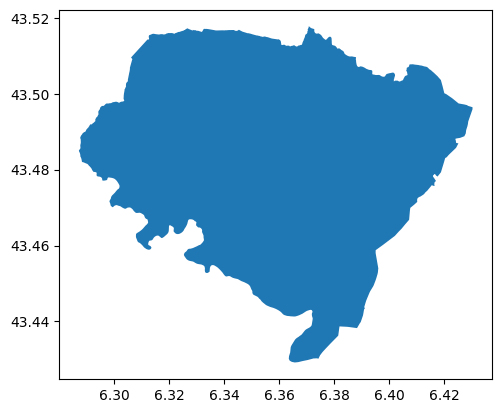

In [8]:
gdf_lorgues = gdf.loc[gdf['name'] == Commune] #le geodataframe de la Commune de Lorgues
gdf_lorgues.plot()
gdf_lorgues

## Voies sur la commune de Lorgues

C:\Git-Repos\cim\venv\Lib\site-packages\osmnx\graph.py:392: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  polygon = gdf_place["geometry"].unary_union


<Axes: >

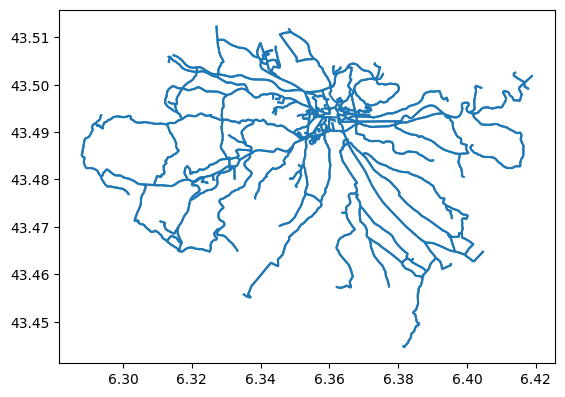

In [9]:
import networkx as nx

graph = ox.graph_from_place(Commune, network_type='drive')
gdf_nodes, gdf_edges = ox.graph_to_gdfs(
        graph,
        nodes=True, edges=True,
        node_geometry=True,
        fill_edge_geometry=True)

routes_gdf = gdf_edges
routes_gdf.plot() #Les routes situant dans la Commune de Lorgues

## Boulevard de la République
Route à piétoniser

In [13]:
routes_names=list(routes_gdf["name"]) #On obtient la liste de toutes les routes dans la commune de Lorgues
j=0
while j < len(routes_names):
    if (type(routes_names[j]) != str):
        routes_names.pop(j)
    else:
        j += 1
len(routes_names) #On retient que les routes ayant un nom valable
routes_names.sort()
if ('Boulevard de la République' in routes_names):
    print(True)
routes_pietonisation = 'Boulevard de la République' #on choisit comme exmple le Boulevard de la République
routes_names.index(routes_pietonisation) #L'indice du Boulevard de la République dans la liste

True


87

In [14]:
gdf_republique = routes_gdf.loc[routes_gdf['name'] == routes_pietonisation] #le geodataframe du Boulevard de la République
len(gdf_republique)

4

## Test

In [29]:
buffered = buffer_route(route,100)
buffered

C:\Users\mathieu.rajerison\AppData\Local\Temp\ipykernel_19696\47775820.py:43: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  routes_buffered_union = routes_buffered.unary_union


,geometry
0,"POLYGON ((6.3586 43.49227, 6.3583 43.49229, 6...."


In [40]:
features = get_mapillary_data_bb(6.35692978371443, 43.49219720782365, 6.361864866173852, 43.494091792618796)
features

[[{'type': 'Feature',
   'geometry': {'type': 'Point',
    'coordinates': [6.357066035270691, 43.491638644507645]},
   'properties': {'first_seen_at': 1514556563000,
    'id': 314073356764287,
    'last_seen_at': 1514556563000,
    'value': 'object--street-light'}},
  {'type': 'Feature',
   'geometry': {'type': 'Point',
    'coordinates': [6.359909176826477, 43.49319143287087]},
   'properties': {'first_seen_at': 1514556488000,
    'id': 519922662712800,
    'last_seen_at': 1514556488000,
    'value': 'object--street-light'}},
  {'type': 'Feature',
   'geometry': {'type': 'Point',
    'coordinates': [6.366968750953674, 43.49219516222058]},
   'properties': {'first_seen_at': 1462276614772,
    'id': 513895320048058,
    'last_seen_at': 1462276614772,
    'value': 'object--street-light'}},
  {'type': 'Feature',
   'geometry': {'type': 'Point',
    'coordinates': [6.368304491043091, 43.49317197461707]},
   'properties': {'first_seen_at': 1634203332676,
    'id': 943497122922387,
    'last

In [41]:
len(features)

1

In [42]:
len(features[0])

240

In [36]:
len(features[0][0])

3

In [61]:
features[0][0]['geometry']

{'type': 'Point', 'coordinates': [6.357066035270691, 43.491638644507645]}

In [66]:
features2 = features[0]
feat = features2[0]
geom = shape(features2[0]['geometry'])
geom.intersects(polygon).iloc[0]
if geom.intersects(polygon).iloc[0].all():
    print(True)
else:
    print(False)

False


In [73]:
polygon = buffered
filtered_features = []
features2 = features[0]
for feature in features2:
    geom = shape(feature['geometry'])
    if (geom.intersects(polygon).values.all()):
        filtered_features.append(feature)
        
print(len(filtered_features), '/', len(features2))

38
240


## Fonctions

In [76]:
import mercantile
import requests
from vt2geojson.tools import vt_bytes_to_geojson
from concurrent.futures import ThreadPoolExecutor
from shapely.geometry import box, shape
import geopandas as gpd
import os, json
import functools

# Choix de type de tuiles vectorielles
def choose_data_type(data_type):
    """
    Choisie le type des entités à récupérer
    
    Cette fonction prend en entrée le type de données tuiles des entités à récupérer ("tile_points" pour les points ou "tile_traffic_signs" pour
    les paneaux de signalisation) et retourne le type des entités à récupérer.
    
    Paramètres :
    - data_type (str) : le type de données tuiles des entités à récupérer.

    Retour :
    - 'mly_map_feature_point' (str) : la clé mapillary décrivant les entités "points".
    - 'mly_map_feature_traffic_sign' (str) : la clé mapillary décrivant les entités "traffic_signs".
    """
    if (data_type == "tile_points"):
        return("mly_map_feature_point")
    elif (data_type == "tile_traffic_signs"):
        return("mly_map_feature_traffic_sign")

# Charger le fichier tabulaire contenant la clé Token d'accès Mapillary
with open("../notebooks/mapillary_token.txt", encoding="utf-8") as f:
    access_token = f.read()

# Fonction pour créer la zone tampon
def buffer_route(routes_gdf,d): #Création d'une zone tampon de la route   
        
    routes_gdf = routes_gdf.to_crs(epsg=2154) #pour prendre en concidération la distance en mètres avant la réalisation du buffer
    
    routes_buffered = routes_gdf.buffer(d,resolution=20)
    
    routes_buffered = routes_buffered.to_crs(epsg=4326)
 
    routes_buffered_union = routes_buffered.unary_union
    
    gdf_routes_buffered_union = gpd.GeoDataFrame(geometry=[routes_buffered_union])

    return(gdf_routes_buffered_union)

# Fonction pour filtrer les entités qui intersectent la zone tampon
def filter_features(features, polygon):

    """
    Récupérer les entités qui intersectent un polygone.
    
    Cette fonction prend en entrée les dictionnaires des données des entités et un polygone d'intersection et retourne les entités qui intersectent
    le polygone.
    
    Paramètres :
    - features (dict) : dictionnaires des données des entités.
    - polygon (hapely.geometry.Polygon) : polygone d'intersection.

    Retour :
    - filtered_features (dict) : dictionnaire des entités qui intersectent le polygone.
    """
    filtered_features = []
    for feature in features:
        geom = shape(feature['geometry'])
        if geom.intersects(polygon).values.all():
            filtered_features.append(feature)
    return filtered_features

# Fonction pour récupérer les données d'une tuile vectorielle
def fetch_tile(tile, data_type):
    """
    Chercher et récupérer les données des entités à partir d'une tuile vectorielle.
    
    Cette fonction prend en entrée une tuile vectorielle ainsi que le type de données tuiles à récupérer et retourne le dictionnaire des données
    des entités contenues dans cette tuile.
    
    Paramètres :
    - tile (mercantile.Tile) : tuile vectorielle.
    - data_type (str) : le type de données tuiles des entités à récupérer.

    Retour :
    - data['features'] (dict) : dictionnaire des données des entités contenues dans la tuile.
    """
    tile_url = f'https://tiles.mapillary.com/maps/vtp/{choose_data_type(data_type)}/2/{tile.z}/{tile.x}/{tile.y}?access_token={access_token}'
    response = requests.get(tile_url)
    data = vt_bytes_to_geojson(response.content, tile.x, tile.y, tile.z)

    #choisir les type selon les valeurs des entités
    filtered_data = [feature for feature in data['features'] if feature['properties']['value'] in filter_values]
    return (filtered_data)

#def fetch_tile_traffic_sign(tile):
    #return fetch_tile(tile, 'tile_traffic_signs')

#def fetch_tile_points(tile):
    #return fetch_tile(tile, 'tile_points')
    
def get_mapillary_data_bb(W, S, E, N):

    # Récupérer la liste des tuiles intersectant notre bounding box
    tiles = list(mercantile.tiles(W, S, E, N, 14))
    
    # Créer un polygone à partir de la bounding box
    bbox_polygon = box(W, S, E, N)
    gdf_bbox = gpd.GeoDataFrame({'geometry': [bbox_polygon]}, crs='EPSG:4326')

    # Utilisation de functools.partial pour fixer la valeur de l'argument 'data_type' dans la fonction fetch_tile
    partial_fetch_tile = functools.partial(fetch_tile, data_type=data_type)

    # Exécuter les requêtes en parallèle vu le nombre important des tuiles
    with ThreadPoolExecutor() as executor:
        results = list(executor.map(partial_fetch_tile, tiles))
        
    return(results)

# Récupérer les données (selon choix : points ou panneaux de signalisation) depuis l'API de Mapillary
def get_mapillary_data(data_type, access_token, highways, output_folder):

    """
    Récupérer les données de Mapillary à partir d'une bbox.
    
    Cette fonction prend en entrée le type de données tuiles des entités à récupérer ("tile_points" pour les points ou "tile_traffic_signs" pour
    les paneaux de signalisation), la clé Token d'accès Mapillary, ainsi que les coordonnées du bbox à partir duquel ces données sont extraites
    et retourne les données Mapillary catégorie "Points" incluses dans cette bbox.
    
    Paramètres :
    - data_type (str) : le type de données tuiles des entités à récupérer.
    - access_token (str) : la clé Token d'accès Mapillary.
    - W (float) : Longitude max de la bbox.
    - S (float) : Latitude min de la bbox.
    - E (float) : Longitude min de la bbox.
    - N (float) : Latitude max de la bbox.

    Retour :
    - gdf_mapillary (geopandas.GeoDataFrame) : Le GeoDataFrame des données Mapillary extraites.
    - gdf_bbox (geopandas.GeoDataFrame) : Le GeoDataFrame de la bbox.
    """
    # créer la zone tampon de la route choisie
    buffered = buffer_route(highways,100)
    
    # Les coordonnées du Bounding box de la zone tampon de la route choisie
    minx, miny, maxx, maxy = buffered.bounds['minx'].values[0],buffered.bounds['miny'].values[0],buffered.bounds['maxx'].values[0],buffered.bounds['maxy'].values[0]
    (W, S, E, N) = (minx, miny, maxx, maxy)
    
    print(W, S, E, N)
    features = get_mapillary_data_bb(W, S, E, N)
    
    # Définir un GeoJSON vide en tant que sortie
    output = {"type": "FeatureCollection", "features": []}

    # Filtrer les resultats des entités contenues dans la zone tampon
    for feat in features:
        filtered_features = filter_features(feat, buffered)
        output['features'].extend(filtered_features)

    # Export du fichier résultat sous fromat geojson
    with open(output_folder, "w") as fx:
        json.dump(output, fx)
        gdf_mapillary = gpd.GeoDataFrame.from_features(output)
    return(gdf_mapillary,buffered)

# Visualisation :
from ipyleaflet import Map, GeoJSON, GeoData, ZoomControl

import geopandas, pandas as pd, numpy as np

def render_map(data, pol):

    """
    Visualsation des données OSM extraites à partir d'un polygone quelconque (bbox ou buffer ou contour de commune/quartier...).
    
    Cette procedure prend en entrée les données OSM ainsi que le polygone à partir duquel ces données sont extraites et retourne
    les données OSM catégorie "transport" incluses dans cette zone.
    
    Paramètres :
    - data (geopandas.GeoDataFrame) : Le GeoDataFrame des données OSM extraites.
    - pol (geopandas.GeoDataFrame) : Le GeoDataFrame du polygone d'extraction. 
    """    
    
    m = Map(center=(pol.bounds['miny'].values[0],pol.bounds['minx'].values[0]))

    # Visualisation des données extraites
    geo_data1 = GeoData(geo_dataframe = data,
        style={'color': 'black', 'radius':3, 'fillColor': '#cc3333', 'opacity':1, 'weight':1, 'dashArray':'2', 'fillOpacity':1},
        hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
        point_style={'radius': 5, 'color': 'red', 'fillOpacity': 0.8, 'fillColor': 'blue', 'weight': 3},
        name = 'Release')

    # Visualisation du polygone d'extraction
    geo_data2 = GeoData(geo_dataframe = pol,
        style={'color': 'blue', 'radius':2, 'fillColor': '#004dff', 'opacity':1, 'weight':2, 'dashArray':'1', 'fillOpacity':0})
    
    m.add(geo_data2)
    m.add(geo_data1)

    m.fit_bounds([[pol.bounds['miny'].values[0], pol.bounds['minx'].values[0]], # Ajuster le zoom et centrer la carte pour afficher les limites du polygone
              [pol.bounds['maxy'].values[0], pol.bounds['maxx'].values[0]]])
    
    display(m)

route = gdf_republique
data_type = "tile_points"
filter_values = ["object--street-light"]
Name = "Eclairage_depuis_routes_Mly"
output_folder = "../data/processed/"+Name+".geojson"

# Donnée Mapillary à récupérer
Eclairage_mapillary, highways_buffered = get_mapillary_data(data_type, access_token, route, output_folder)
print("end")

# Rendu carto
render_map(Eclairage_mapillary, highways_buffered)

C:\Users\mathieu.rajerison\AppData\Local\Temp\ipykernel_19696\4150332627.py:43: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  routes_buffered_union = routes_buffered.unary_union


6.35692978371443 43.49219720782365 6.361864866173852 43.494091792618796


C:\Git-Repos\cim\venv\Lib\site-packages\vt2geojson\tools.py:27: DeprecationWarning: `decode` signature has changed, use `default_options` instead
  data = decode(b_content, y_coord_down=True)


end


Map(center=[np.float64(43.49219720782365), np.float64(6.35692978371443)], controls=(ZoomControl(options=['posi…